# Background
In 1973, Francis J. Anscombe published a paper titled, Graphs in Statistical Analysis [1].  Anscombe states that most textbooks and statisitcal programs of the time reinforce the idea that "numerical calculations are exact, but graphs are rough." He proposes that computers should be able to generate *both* calculations *and* graphs.

Anscombe then shows in the paper a table of numbers to show the need for combining both calucations and graphing techniques to examine datasets. It is unknown (as far as I can find) how Anscombe generated these sets but methods have been created to generate similar datasets [2]. 

The generated data contains four distinct datasets (hence the name Anscombe's Quartet), each with statistical properties that are essentially identical: the mean of the x values is 9.0 (exactly), mean of y values is 7.5 (to 2 decimal places), they all have nearly identical variances (x is exactly the same and y is ±0.003), correlations, and regression lines (to at least two decimal places)[3,4]. The X values for the 1st three datasets are identical. 

[1] Anscombe, F. J. "Graphs in Statistical Analysis." The American Statistician, vol. 27, no. 1, 1973, pp. 17–21. JSTOR, JSTOR, www.jstor.org/stable/2682899.

[2] S. Chatterjee and A. Firat, "Generating Data with Identical Statistics but Dissimilar Graphics," The American Statistician, vol. 61, no. 3, pp. 248–254, Aug. 2007.

[3] Wikipedia contributors. "Anscombe's quartet." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 5 Sep. 2018. Web. 3 Nov. 2018.

[4] RStudio Developers. "Anscombe's Quartet of 'Identical' Simple Linear Regressions" https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html Web. 3 Nov. 2018


# Descriptive Stats

The mean and median are shown in the describe() method but just for readability I am repeating them here as separate cells with the mode. In a similar way I also show the standard deviation for each x and y value.


In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
# read in csv file but don't import 1st column (column zero)
df = pd.read_csv("anscombe.csv",usecols=range(1,9))
# printing out df for test file 
df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [5]:
df.describe()


,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


In [6]:
df.mean()

x1    9.000000
x2    9.000000
x3    9.000000
x4    9.000000
y1    7.500909
y2    7.500909
y3    7.500000
y4    7.500909
dtype: float64

In [9]:
df.median()


x1    9.00
x2    9.00
x3    9.00
x4    8.00
y1    7.58
y2    8.14
y3    7.11
y4    7.04
dtype: float64

In [13]:
df.mode()

,dataset,x,y
0,I,8.0,8.84
1,II,NaN,NaN
2,III,NaN,NaN
3,IV,NaN,NaN


In [19]:
df.std()

x1    3.316625
x2    3.316625
x3    3.316625
x4    3.316625
y1    2.031568
y2    2.031657
y3    2.030424
y4    2.030579
dtype: float64

# Fitting a Model
As shown below by using polyfit<sup>1</sup> we can calculate the 

[1] https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

In [31]:
# there is probably a more python-esque way of doing this (TODO)
xValues1 = df['x1']
yValues1 = df['y1']
dataset1Model = np.polyfit(xValues1,yValues1,1)
xValues2 = df['x2']
yValues2 = df['y2']
dataset2Model = np.polyfit(xValues2,yValues2,1)
xValues3 = df['x3']
yValues3 = df['y3']
dataset3Model = np.polyfit(xValues3,yValues3,1)
xValues4 = df['x4']
yValues4 = df['y4']
dataset4Model = np.polyfit(xValues4,yValues4,1)
print(dataset1Model)
print(dataset2Model)
print(dataset3Model)
print(dataset4Model)


[ 0.50009091  3.00009091]
[ 0.5         3.00090909]
[ 0.49972727  3.00245455]
[ 0.49990909  3.00172727]


# Plots

Plotting using seaborn.lmplot<sup>1</sup> which uses regplot<sup>2</sup> that allows us to plot data and a linear regression model fit.


1 https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot
2 https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

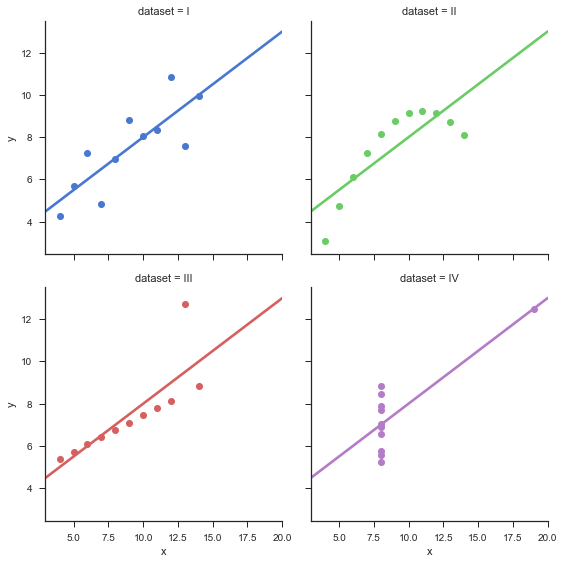

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# ticks style just to make the plot more readable https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(style="ticks")
df = sns.load_dataset("anscombe")
     
# Show the results of a linear regression within each dataset
# lmplot https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot 
# while this is "one line" of code this is the part that took the longest as trying to figure out the attributes took me a long time
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})
# weird issue - I had to use a ; to stop the plots appearing twice - fixed this by using %matplotlib inline (earlier)
# https://github.com/statsmodels/statsmodels/issues/1265
plt.show()

# Discussion

The quartet and Anscombe's goal was to illustrate the importance of looking at a set of data graphically and computationally before starting to analyze according to a particular type of relationship, and the inadequacy of basic statistic properties for describing realistic datasets. The descriptive statisitics for these datasets would misled just based on their values and not give the person the true nature of the dataset compared to the other datasets. 

The first scatter plot in blue appears to be a simple linear relationship with a clean and well-fitting linear models corresponding to two variables correlated and following the assumption of normality.

The second graph in green is not distributed normally; while a relationship between the two variables is obvious, it is not linear and it does not have a linear correlation. 

In the third graph in red, the distribution is linear but the linear regression is thrown off by an outlier and itshould have a different regression line. It would be easy to fit a correct linear model, if only the outlier were spotted and removed before doing so.

Finally, the fourth graph in purple shows an example when one outlier is enough to produce a high correlation coefficient, even though the dataset does not fit any kind of linear model, but the single outlier forces it to have a high correlation coefficient.